# Tutorial 1: Unconfined, Semiflexible Homopolymer

This demonstration walks through a simulation of an unconfined, semiflexible homopolymer. In this notebook, we specify a binder, polymer, and field, then we run a simulation. In addition to the setup and evaluation of the simulation, this notebook includes an analysis of end-to-end distance to verify the validity of the model. 

#### Import Modules

Below, we import the built-in, third-party, and custom modules that we need to simulate a semiflexible homopolymer. All simulations require three types of components: binders, polymers, and fields. In this case, we are simulating a homopolymer without binding components. Therefore, we can use the `NullBinder` class from the `binders` module as a placeholder. The polymer is an instance of the `SSWLC` class from the `polymers` module. Generally speaking, interactions between monomers are handled by the field containing the polymer. In this case, we use the `NullField` class as a placeholder since we do not have any interacting components. The `chromo.mc` init file contains the code necessary to run the simulation. The `mc_controller` module manages the move and selection amplitudes, and the `get_unique_subfolder_name` function helps us create a unique directory for the simulation results.



In [1]:
# Built-in modules
import os
import sys

# Third-party modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Custom modules
from chromo.binders import get_by_name, make_binder_collection
from chromo.polymers import SSWLC
from chromo.fields import NullField
import chromo.mc as mc
import chromo.mc.mc_controller as ctrl
from chromo.util.reproducibility import get_unique_subfolder_name

#### Specify Binders

Since we do not have any binding components, we will use the `NullBinder` class as a placeholder. We will instantiate the binder using the `get_by_name` method from the `binders` module. The `get_by_name` method requires the name of the binder as a string. In this case, we specify "null_reader" as the name of the binder.

The `make_binder_collection` method will produce a Pandas data frame summarizing the binder's properties, which we refer to as a "binder collection." A binder collection is necessary to run a simulation.

In [2]:
# Initialize a null binder to serve as a placeholder
null_binder = get_by_name("null_reader")

# Create a binder collection (required to run a simulation)
binder_collection = make_binder_collection([null_binder])

#### Instantiate the Polymer

Specify the name, number of beads, bead spacing, and persistence length of the polymer. Using these properties, we will initialize a polymer using a Gaussian random walk using the `gaussian_walk_polymer` class method. The persistence length must be specified as a named argument.

In [3]:
# Specify the name, number of beads, bead spacing, and persistence length of the polymer
name = "poly"
num_beads = 1000
bead_spacings = np.ones(num_beads - 1)
lp = 10

# Instantiate the polymer
poly = SSWLC.gaussian_walk_polymer(name, num_beads, bead_spacings, lp=lp)

No states defined.
No chemical modifications defined.


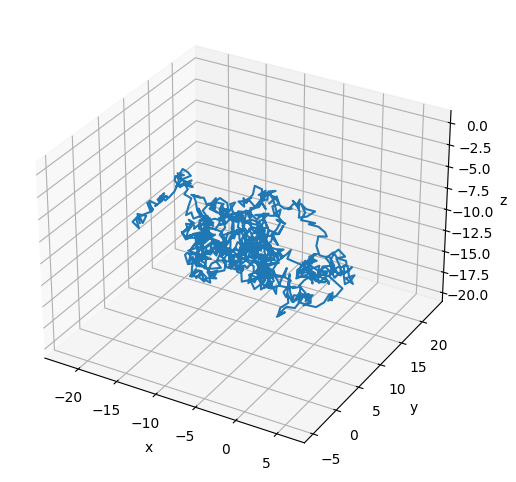

In [4]:
# Plot the initial configuration of the polymer
x = poly.r[:, 0]
y = poly.r[:, 1]
z = poly.r[:, 2]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
ax.plot3D(np.asarray(x), np.asarray(y), np.asarray(z))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

#### Instantiate the Null Field

We use the `NullField` class as a placeholder for the field containing the polymer since we do not have any interacting components.

In [5]:
# The field contains the polymer
field = NullField(polymers=[poly])

#### Specify the Simulation Parameters

We start by specifying the move and selection amplitudes for the simulation. The move amplitude indicates how large of a transformation each MC move can propose. Specific details about what the move amplitude represents depend on the exact MC move involved. The selection amplitude indicates the maximum number of beads that can be affected by an MC move. How the selection is made depends on the specific moves involved. We can automatically set appropriate amplitudes using the `get_amplitude_bounds` method of the `mc` module.

In [6]:
amp_bead_bounds, amp_move_bounds = mc.get_amplitude_bounds(
    polymers = [poly]
)

Since we do not have any binders, we want to evaluate MC moves that only involve geometric transformations. We can do this with the `all_moves_except_binding_state` methods from the move controller modules. The move selection requires us to specify an output directory to which attempted moves can be logged. We will use the `get_unique_subfolder_name` function to help us create a new directory for the simulation results. The `SimpleController` class from the `mc_controller` module will manage the move and selection amplitudes so that we target 50% acceptance rates for all moves.

In [7]:
out_dir = "output_demo"
latest_sim = get_unique_subfolder_name(f"{out_dir}/sim_")
moves_to_use = ctrl.all_moves_except_binding_state(
    log_dir=latest_sim,
    bead_amp_bounds=amp_bead_bounds.bounds,
    move_amp_bounds=amp_move_bounds.bounds,
    controller=ctrl.SimpleControl
)

To run a simulation, you must specify the number of snapshots and the number of MC steps to attempt per snapshot. The simulation will output the polymer's configuration at each snapshot.

In [8]:
# Specify the number of snapshots and the number of MC steps to attempt per snapshot
num_snapshots = 200
mc_steps_per_snapshot = 1000

#### Run the Simulation

Run the simulation by specifying the components of the simulation as well as the simulation parameters. The `polymer_in_field` method from the `mc` module will run the simulation.

In [9]:
polymers = mc.polymer_in_field(
    polymers = [poly],
    binders = binder_collection,
    field = field,
    num_save_mc = mc_steps_per_snapshot,
    num_saves = num_snapshots,
    bead_amp_bounds = amp_bead_bounds,
    move_amp_bounds = amp_move_bounds,
    output_dir = out_dir,
    mc_move_controllers = moves_to_use
)

Save point 0 completed
Save point 1 completed
Save point 2 completed
Save point 3 completed
Save point 4 completed
Save point 5 completed
Save point 6 completed
Save point 7 completed
Save point 8 completed
Save point 9 completed
Save point 10 completed
Save point 11 completed
Save point 12 completed
Save point 13 completed
Save point 14 completed
Save point 15 completed
Save point 16 completed
Save point 17 completed
Save point 18 completed
Save point 19 completed
Save point 20 completed
Save point 21 completed
Save point 22 completed
Save point 23 completed
Save point 24 completed
Save point 25 completed
Save point 26 completed
Save point 27 completed
Save point 28 completed
Save point 29 completed
Save point 30 completed
Save point 31 completed
Save point 32 completed
Save point 33 completed
Save point 34 completed
Save point 35 completed
Save point 36 completed
Save point 37 completed
Save point 38 completed
Save point 39 completed
Save point 40 completed
Save point 41 completed
Sa

#### Analyze the Simulation

Monte Carlo simulations require a few steps to equilibrate. We will ignore those steps of the MC simulation. Following equilibration, we will analyze the end-to-end distance of the polymer to verify the validity of the model.

In [10]:
# Load the simulation results
sim_dir = latest_sim

# Load and sort snapshots
snapshots = os.listdir(sim_dir)
snapshots = np.array([snap for snap in snapshots if snap.startswith("poly") and snap.endswith(".csv")])
snap_inds = np.array([int(snap.split("-")[-1].split(".")[0]) for snap in snapshots])
snapshots = snapshots[np.argsort(snap_inds)]
snap_inds = np.sort(snap_inds)

# Isolate equilibrated snapshots
num_equilibration_steps = 180
snapshots = snapshots[num_equilibration_steps:]

In [11]:
# Specify the segment lengths for which to calculate the end-to-end distances
bead_steps = np.arange(1, 100)
kuhn_steps = bead_steps / (2 * lp)

# Calculate the end-to-end distances for variable segment lengths along the polymer
mean_r2 = []
for i, snap in enumerate(snapshots):
    snap_path = os.path.join(sim_dir, snap)
    config = pd.read_csv(snap_path, sep=",", header=[0, 1], index_col=0)
    r = config["r"].to_numpy()
    mean_r2_snap = []
    for step in bead_steps:
        r1 = r[:-step]
        r2 = r[step:]
        delta_r = r2 - r1
        mean_end_to_end = np.average(np.linalg.norm(delta_r, axis=1) ** 2)
        mean_r2_snap.append(mean_end_to_end)
    mean_r2_snap = np.array(mean_r2_snap)
    mean_r2.append(mean_r2_snap)
mean_r2 = np.array(mean_r2)
mean_r2 = np.average(mean_r2, axis=0)

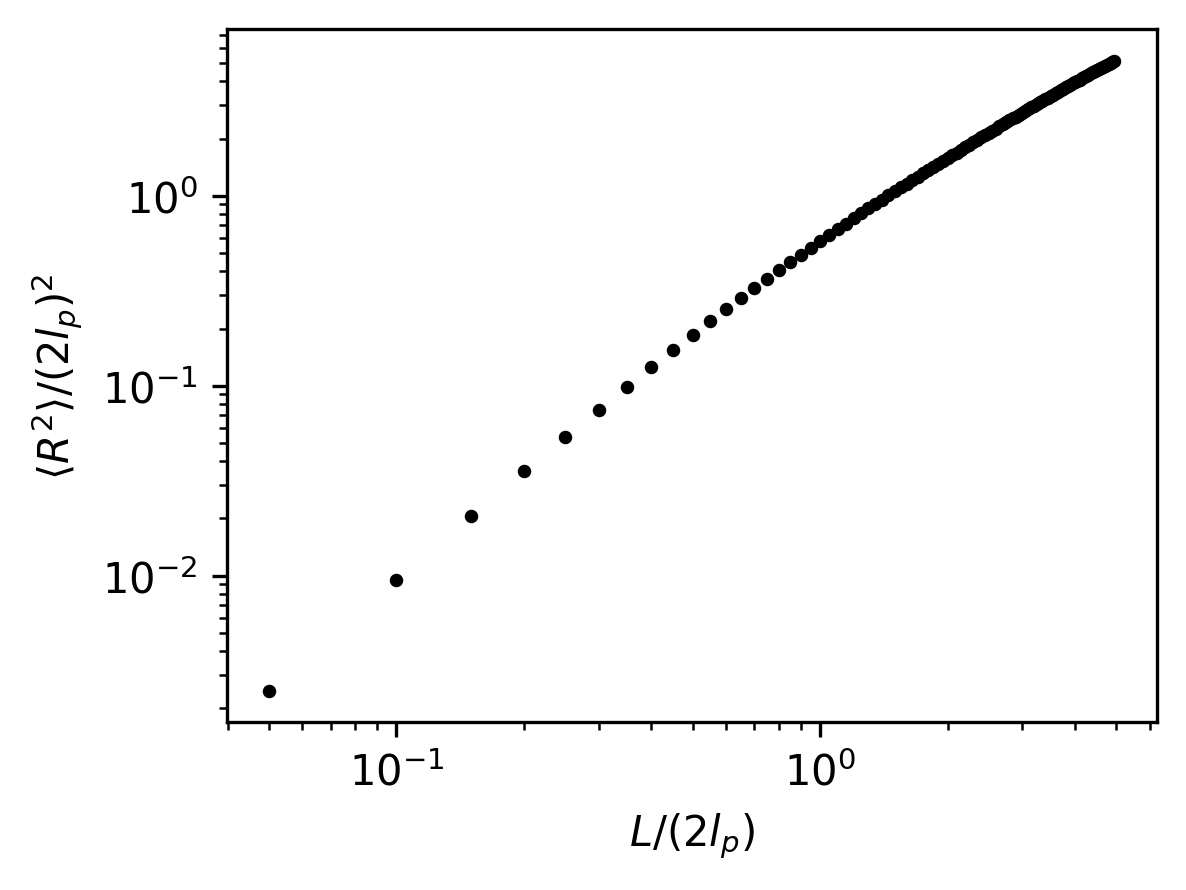

In [12]:
# Plot the non-dimensionalized mean-squared end-to-end distances
plt.figure(figsize=(4, 3), dpi=300)
plt.scatter(kuhn_steps, mean_r2/((2 * lp)**2), color="black", s=5)
plt.xlabel(r"$L/(2l_p)$")
plt.ylabel(r"$\langle R^2 \rangle / (2l_p)^2$")
plt.xscale("log")
plt.yscale("log")
plt.show()

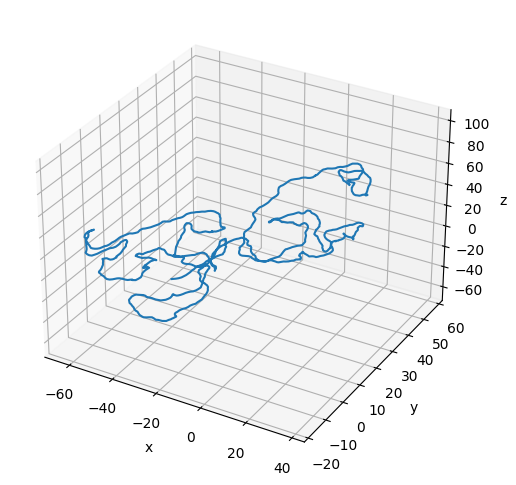

In [13]:
# Plot the final configuration of the polymer
x = polymers[0].r[:, 0]
y = polymers[0].r[:, 1]
z = polymers[0].r[:, 2]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
ax.plot3D(np.asarray(x), np.asarray(y), np.asarray(z))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()